<a href="https://colab.research.google.com/github/37stu37/rnc2_project/blob/main/fragility_functions_Julia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [52]:
data = {'Typology':['Adobe', 'Brick URM', 'Stone URM', 'RC Frame', 'Steel'],
        'DS1_mu':[0, 0.13, 0.29, 0.29, 0],
        'DS1_s':[0, 0.38, 0.70, 0.38, 0],
        'DS2_mu':[0.13, 0.16, 0.32, 0.63, 0.2],
        'DS2_s':[1.36, 0.42, 0.71, 0.70, 0.64],
        'DS3_mu':[0.97, 0.22, 0.39, 1.29, 0.38],
        'DS3_s':[1.73, 0.48, 0.69, 0.83, 0.64],
        'Ref':["[Didier et al.(2017)]", "[Gautam et al.(2018)]", "[Gautam et al.(2018)]", "[Gautam et al.(2018)]", "[Hazus]"]}

In [53]:
data

{'DS1_mu': [0, 0.13, 0.29, 0.29, 0],
 'DS1_s': [0, 0.38, 0.7, 0.38, 0],
 'DS2_mu': [0.13, 0.16, 0.32, 0.63, 0.2],
 'DS2_s': [1.36, 0.42, 0.71, 0.7, 0.64],
 'DS3_mu': [0.97, 0.22, 0.39, 1.29, 0.38],
 'DS3_s': [1.73, 0.48, 0.69, 0.83, 0.64],
 'Ref': ['[Didier et al.(2017)]',
  '[Gautam et al.(2018)]',
  '[Gautam et al.(2018)]',
  '[Gautam et al.(2018)]',
  '[Hazus]'],
 'Typology': ['Adobe', 'Brick URM', 'Stone URM', 'RC Frame', 'Steel']}

In [54]:
df = pd.DataFrame(data)

In [55]:
df

,Typology,DS1_mu,DS1_s,DS2_mu,DS2_s,DS3_mu,DS3_s,Ref
0,Adobe,0.00,0.00,0.13,1.36,0.97,1.73,[Didier et al.(2017)]
1,Brick URM,0.13,0.38,0.16,0.42,0.22,0.48,[Gautam et al.(2018)]
2,Stone URM,0.29,0.70,0.32,0.71,0.39,0.69,[Gautam et al.(2018)]
3,RC Frame,0.29,0.38,0.63,0.70,1.29,0.83,[Gautam et al.(2018)]
4,Steel,0.00,0.00,0.20,0.64,0.38,0.64,[Hazus]


In [ ]:
# !!!!!! EXAMPLE

# import math
# from scipy import stats

# # standard deviation of normal distribution
# sigma = 0.859455801705594
# # mean of normal distribution
# mu = 0.418749176686875
# # hopefully, total is the value where you need the cdf
# total = 37

# frozen_lognorm = stats.lognorm(s=sigma, scale=math.exp(mu))
# frozen_lognorm.cdf(total) # use whatever function and value you need 

[]

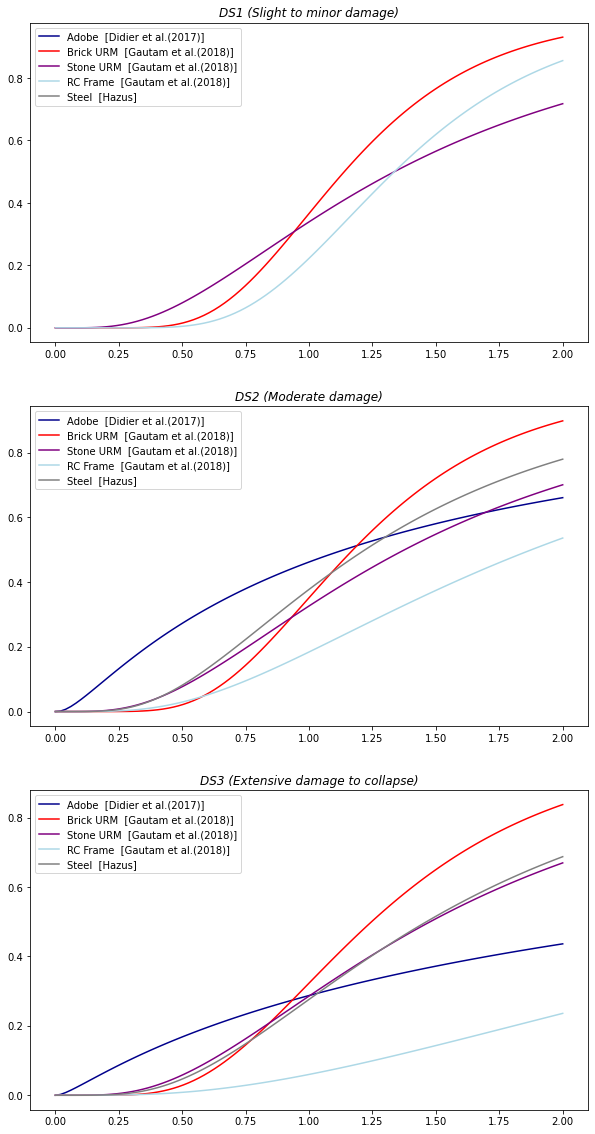

In [62]:
import math
from scipy.stats import lognorm
x=np.linspace(0,2,100)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, figsize=(10,20))

list_ds = ["DS1 (Slight to minor damage)", "DS2 (Moderate damage)", "DS3 (Extensive damage to collapse)"]
list_mu = ["DS1_mu", "DS2_mu", "DS3_mu"]
list_sigma = ["DS1_s", "DS2_s", "DS3_s"]
list_color = ["darkblue", "red", "purple", "lightblue", "grey"]
list_material = df.Typology.values
list_ref = ["[Didier et al.(2017)]", "[Gautam et al.(2018)]", "[Gautam et al.(2018)]", "[Gautam et al.(2018)]", "[Hazus]"]



for j in range(len(list_ds)):
  for i in range(len(list_material)):
    mean = df.loc[df.Typology==list_material[i],list_mu[j]].values[0]
    stddev = df.loc[df.Typology==list_material[i],list_sigma[j]].values[0]
    # dist=lognorm([stddev],loc=mean)
    dist = lognorm(s=stddev, scale=math.exp(mean))
    # frozen_lognorm.cdf(total) # use whatever function and value you need 

    ax[j].plot(x,dist.cdf(x), color=list_color[i], label=list_material[i] + "  " + list_ref[i])
    ax[j].legend(loc="best")
    ax[j].set_title(list_ds[j], fontstyle='italic')


plt.plot()

[]

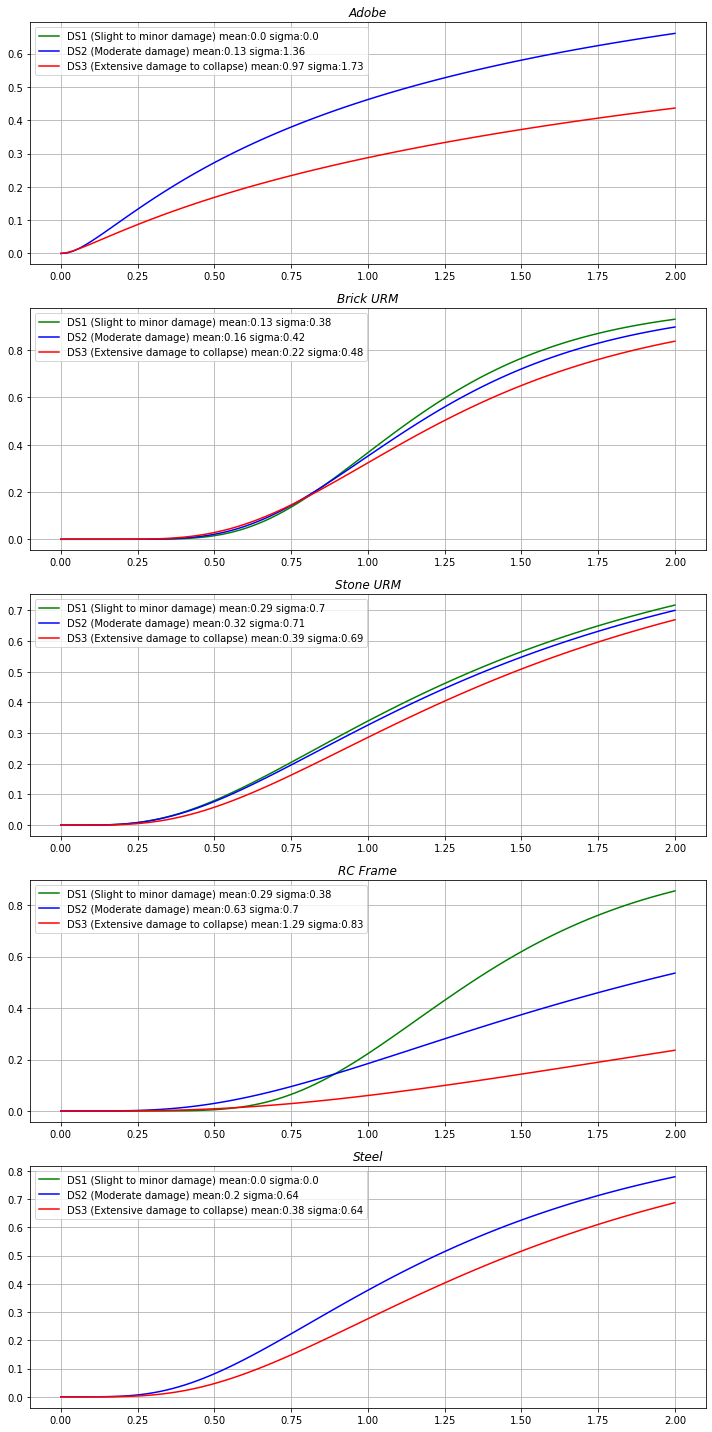

In [72]:
import math
from scipy.stats import lognorm
x=np.linspace(0,2,100)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(len(list_material), figsize=(10,20))

list_ds = ["DS1 (Slight to minor damage)", "DS2 (Moderate damage)", "DS3 (Extensive damage to collapse)"]
list_mu = ["DS1_mu", "DS2_mu", "DS3_mu"]
list_sigma = ["DS1_s", "DS2_s", "DS3_s"]
list_color = ["green", "blue", "red"]
list_material = df.Typology.values


for j in range(len(list_material)):
  for i in range(len(list_ds)):
    mean = df.loc[df.Typology==list_material[j],list_mu[i]].values[0]
    stddev = df.loc[df.Typology==list_material[j],list_sigma[i]].values[0]
    dist = lognorm(s=stddev, scale=math.exp(mean))

    ax[j].plot(x,dist.cdf(x), color=list_color[i], label=list_ds[i] + " " + "mean:" + str(mean) + " " + "sigma:" + str(stddev))
    ax[j].legend(loc="best")
    ax[j].set_title(list_material[j], fontstyle='italic')
    ax[j].grid()

plt.tight_layout()
plt.plot()

## Data from Tom

In [88]:
PGA=[0.1090381636, 0.1343686805, 0.1596991973, 0.1850297141, 0.210360231, 0.2356907478, 0.2598698775, 0.2828976201, 0.3059253626, 0.3278017181, 0.3485266864, 0.3704030418, 0.3934307844, 0.416458527, 0.4394862695, 0.4625140121, 0.4866931418, 0.5120236586, 0.5373541755, 0.5626846923, 0.5880152091, 0.613345726, 0.6386762428, 0.6640067596, 0.6893372764, 0.7146677933, 0.7399983101, 0.7653288269, 0.7906593438, 0.8159898606, 0.8413203774, 0.8666508942, 0.8919814111, 0.9173119279, 0.9426424447, 0.9679729616, 0.9933034784, 1.018633995, 1.043964512, 1.069295029, 1.094625546, 1.119956063, 1.145286579, 1.170617096, 1.195947613, 1.22127813, 1.246608647, 1.271939163, 1.29726968, 1.322600197, 1.347930714, 1.373261231, 1.393986199, 3]
Probability_of_complete_damage=[0.5688835106, 1.544523437, 3.152268105, 5.350893292, 8.002984924, 11.06731878, 14.33365132, 17.56837863, 20.96937696, 24.22089932, 27.37836938, 30.67355888, 34.05944167, 37.41509336, 40.63470512, 43.82408578, 46.97361636, 50.16162288, 53.18473252, 56.05668667, 58.75000252, 61.36086993, 63.73813341, 66.03294845, 68.1491252, 70.14162927, 72.02420209, 73.76936083, 75.43207113, 76.94362594, 78.40021513, 79.74687306, 80.99734113, 82.19284358, 83.27841476, 84.32276173, 85.28466025, 86.15036891, 86.98859477, 87.7993378, 88.5276324, 89.21470277, 89.86054892, 90.46517084, 91.01482714, 91.55074203, 92.0454327, 92.51264055, 92.96610699, 93.3508664, 93.74936722, 94.0929024, 94.40502866, 100]

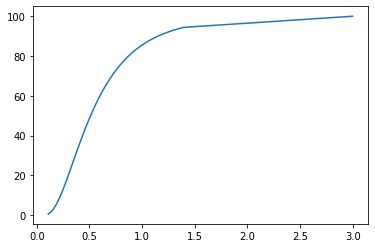

In [89]:
plt.plot(PGA, Probability_of_complete_damage)

No handles with labels found to put in legend.


[]

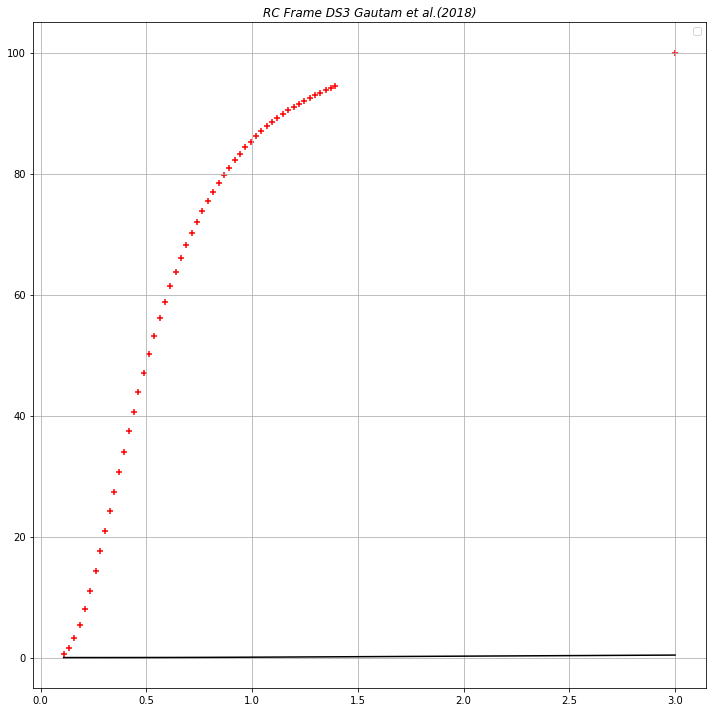

In [112]:
# RC Frame DS3 Gautam et al.(2018)
title="RC Frame DS3 Gautam et al.(2018)"

from scipy.stats import lognorm
mu=	1.29
sigma=0.83

dist = lognorm(s=sigma, scale=math.exp(mu))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10,10))

ax.scatter(PGA, Probability_of_complete_damage, color='red', marker='+')
ax.plot(PGA,dist.cdf(PGA), color="black")
# ax.plot(PGA,s.cdf(PGA), color="green")
ax.legend(loc="best")
ax.set_title(title, fontstyle='italic')
ax.grid()

plt.tight_layout()
plt.plot()

In [103]:
s = np.random.lognormal(mu, sigma, 1000)
cdf = np.cumsum(s)

try to fit data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


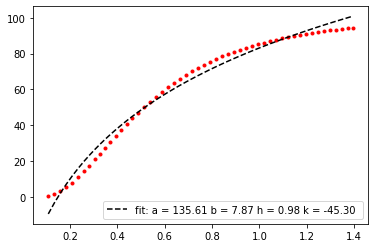

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.optimize import curve_fit

x = np.array(PGA)
y = np.array(Probability_of_complete_damage)

def log(x, a, b, h, k):
    return a*np.log10(b*x + h) + k

# Provide guesses to the parameters
params = [6, 1, 0, 0]#, .2]
popt, pcov = curve_fit(log, x, y, p0=params)

plt.plot(x,y,'r.')
plt.plot(x, log(x, *popt), 'k--', label = 'fit: a = %.2f b = %.2f h = %.2f k = %.2f ' % tuple(popt)) #locl = %.2f scale = %.2f
plt.legend(loc = 'lower right')
#plt.xscale('log')
plt.show()

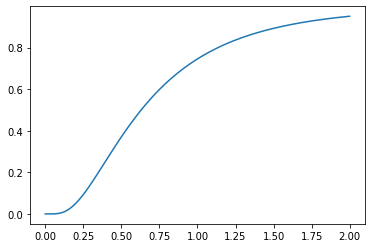

In [124]:
# Correct !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
from scipy.stats import lognorm
stddev = 0.70
mean = 	0.63

dist = lognorm(stddev,scale=mean)

import numpy as np
import pylab as pl
x=np.linspace(0,2,200)
pl.plot(x,dist.cdf(x))
